# FIRST RUN generateFEEMplots

after running generateFEEMplots the variables F em and ex will be available for the fitting routine here.

component options available here (taken from OpenFluor database https://openfluor.lablicate.com/)

https://docs.google.com/spreadsheets/d/1-Psv4vUMNjIBb6seB5hVN828BOHneAJuYYlWnzZ11J8/edit?usp=sharing 

use ID to select sample for fitting.


In [1]:
% load the data. you may have to restart kernel after every data change

clear

load /home/jovyan/data/Danielle/KDB240709ICD28.mat

who
%load /home/jovyan/data/Katharina/KDB-IFB-1.mat
ex

Variables visible from the current scope:

F    Fr   em   emr  ex   exr



ex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
1,374.37,371.1,367.83,364.56,361.29,358.02,354.75,351.48,348.21,344.94,341.67,338.4,335.13,331.86,328.59,325.32,322.05,318.78,315.51,312.24,308.97,305.7,302.43,299.16,295.89,292.62,289.35,286.08,282.81,279.54,276.27,273,269.73,266.46,263.19,259.92,256.65,253.38,250.11,246.84,243.57,240.3


# define functions to manipulate the data 

you can compress these boxes by clicking to the left so they won't "clutter" up the screen

In [2]:
function makecontourplot(F,em,ex)
 colormap('jet')
 h=surf(em,ex,F);
 shading interp
 hold on; [Cref,h]=contour3(em,ex,F,3,'k'); set(h,'linewidth',2); 
 set(gca,'linewidth',2,'fontsize',12)
 axis([min(em) max(em) min(ex) max(ex) 0 max(max(F))])
 view([0 90])
 hold on; plot3([250 600],[450 450],[0 0],'k','linewidth',2)
 hold on; plot3([600 600],[220 450],[0 0],'k','linewidth',2)
 h=xlabel('Emission (nm)'); set(h,'fontsize',12)
 h=ylabel('Excitation (nm)');  set(h,'fontsize',12)
 %add scale bar
 colorbar 
end

# visualize the original data


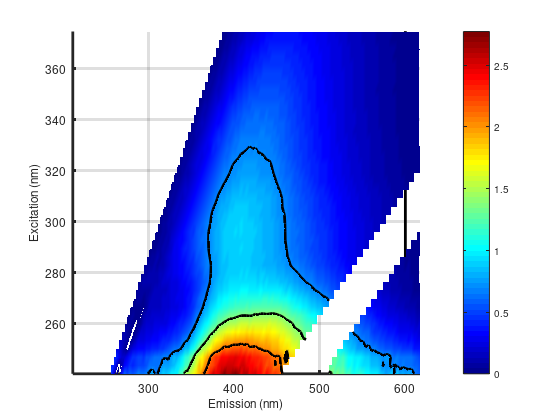

In [3]:
%contour plot over colourmap.
graphics_toolkit ("notebook"); 
makecontourplot(F,em,ex)

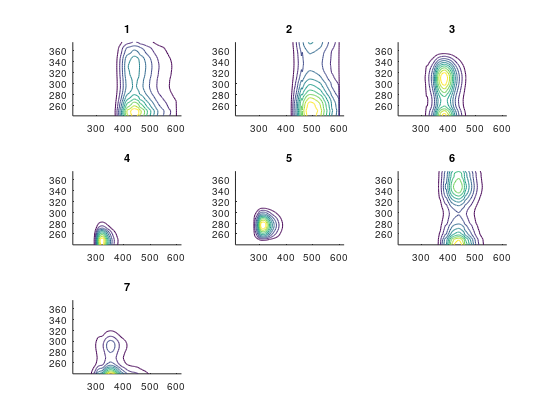

In [4]:
% load the model

%load ID15154.mat %ex 250-500 em 300-550
%load ID13953.mat %ex 250-500 em 300-550
%load ID13953.mat %ex 250-500 em 300-550
%load ID6307.mat %ex 275-450 em 230-440
%load ID9659.mat %EX range 240 to 450 EM range 300 to 600
%load IDNoneatthemoment.mat %ex 200-450 em 250-600
%load ID6173.mat %245-450 and 300-560
%load ID9954.mat %245-450 and 300-560
%load ID6509.mat %230-450	260-550
load ID2882.mat %230-450	260-550

% interpolate over this em and ex for the dataset

for i=1:C
    istr=num2str(i);
    txt=['Cem',istr','i=interp1(Cem,Cem',istr,',em); Cem',istr,'i(isnan(Cem',istr,'i))=0;'];
    eval(txt)
    txt=['Cex',istr','i=interp1(Cex,Cex',istr,',ex); Cex',istr,'i(isnan(Cex',istr,'i))=0;'];
    eval(txt)
    %Cex1i=interp1(Cex,Cex1,ex); Cex1i(isnan(Cex1i))=0; 
    %size(Cex1i)
    %size(Cem1i)
    txt=['F',istr,'=Cex',istr,'i''*Cem',istr,'i'';']; eval(txt);
    subplot(3,3,i); hold on;
    txt=['contour(em,ex,F',istr,')']; eval(txt)
    title(istr)
end
    

In [5]:
% fit to a linear model
FnoNaN=F; FnoNaN(isnan(FnoNaN))=0; % get rid of NaN in the original matrix

%fcn=@(p)(sum(sum((FnoNaN-((10^p(1)).*F1+(10^p(2)).*F2+(10^p(3)).*F3+(10^p(4)).*F4+(10^p(5)).*F5)).^2)));
%p0=[2;2;2;2;2]; 
    
runningtxt=['fcn=@(p)(sum(sum((FnoNaN-('];
for i=1:C
    istr=num2str(i);
    runningtxt=[runningtxt,'(10^p(',istr,')).*F',istr,'+'];
    p0(i)=1;
end

runningtxt=runningtxt(1:length(runningtxt)-1); txt=[runningtxt,')).^2)));']; eval(txt);
options=optimset('MaxFunEvals',10000,'display','off','TolFun',1e-5,'TolX',1e-5);
[pmin,fval]=fminsearch(fcn,p0,options); p=10.^pmin

Ffit=zeros(size(F));
for i=1:C
    istr=num2str(i);
    txt=['Ffit=Ffit+p(i)*F',istr,';']; eval(txt);
end
sumF=sum(sum(FnoNaN)); sumFfit=sum(sum(Ffit)); 
overallfit=100*(sumF-sumFfit)./sumF

%fcn
    

p,1,2,3,4,5,6,7
1,42.368,1.10773e-15,12.3779,3.14142e-18,5.8483e-61,5.76498e-12,21.9507


overallfit = -4.6868


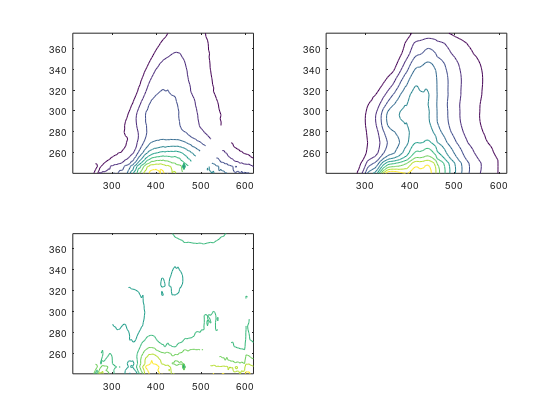

In [6]:
subplot(221)
contour(em,ex,F)
subplot(222)
contour(em,ex,Ffit)
subplot(223)
contour(em,ex,F-Ffit)